# Imports

In [1]:
import inflection
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=3)
pd.options.display.max_rows = 20
pd.options.display.max_columns = 30

## Perguntas:


1. Qual a taxa de Churn atual da empresa?
2. Como a taxa de Churn varia por mês?
3. Qual a Performance do modelo em classificar os clientes como churns?
4. Qual o Faturamento da empresa, se ela impedir que os clientes de entrar em Churn através do seu modelo?
5. Qual o valor de um cupom de desconto você daria para o cliente, a fim de evitar churn? E qual o custo total desse incentivo para a empresa?

## Dataset Description

**RowNumber**: corresponds to the record (row) number and has no effect on the output.  
**CustomerId**: contains random values and has no effect on customer leaving the bank.  
**Surname**: the surname of a customer has no impact on their decision to leave the bank.  
**CreditScore**: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.  
**Geography**: a customer’s location can affect their decision to leave the bank.  
**Gender**: it’s interesting to explore whether gender plays a role in a customer leaving the bank.  
**Age**: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.  
**Tenure**: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.  
**Balance**: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.  
**NumOfProducts**: refers to the number of products that a customer has purchased through the bank.  
**HasCrCard**: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.  
**IsActiveMember**: active customers are less likely to leave the bank.  
**EstimatedSalary**: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.  
**Exited**: whether or not the customer left the bank. (0=No,1=Yes)

##  Helper Functions

### Data Handling:

In [2]:
def rename_cols(old_cols):
    snake_case = lambda x: inflection.underscore(x)
    return list(map(snake_case, old_cols))

### Tools for Plotting:

In [24]:
def hargs(bins=np.arange(0, 2, 1), hstep='step', lwidth=3, c='r', label='Churn', normed=False):
    return {'bins': bins, 'histtype': hstep, 'linewidth': lwidth, 'color': c, 'density': normed, 'label': label}

In [46]:
def plot_vars(normed=False):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
    (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = ax

    mask = (df1.exited == 1)
    
    var = df1.credit_score
    bins = np.arange(300, 900, 50)
    ax1.hist(var[mask], **hargs(bins=bins, normed=normed))       
    ax1.hist(var[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax1.set_xlabel('Credit Score')
    ax1.legend(loc='upper left')

    var = df1.age
    bins = np.arange(10, 110, 10)
    ax2.hist(var[mask], **hargs(bins=bins, normed=normed))
    ax2.hist(var[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax2.set_xlabel('Age')
    ax2.legend()

    var = df1.tenure
    bins = np.arange(0, 11, 1)
    ax3.hist(var[mask], **hargs(bins=bins, normed=normed))
    ax3.hist(var[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax3.set_xlabel('Tenure')
    ax3.legend(loc='upper left')

    var = df1.balance
    bins = np.arange(0, 300_000, 20_000)
    ax4.hist(var[mask], **hargs(bins=bins, normed=normed))
    ax4.hist(var[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax4.set_xlabel('Balance')
    ax4.legend()

    var = df1.country
    bins = np.arange(-0.5, 3.5, 1)
    ax5.hist(var[mask], **hargs(bins=bins, normed=normed))
    ax5.hist(var[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax5.set_xlabel('Country')
    ax5.legend()

    var = df1.num_products
    bins = np.arange(.5, 5.5, 1)
    ax6.hist(var[mask], **hargs(bins=bins, normed=normed))
    ax6.hist(var[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax6.set_xlabel('#  of Products')
    ax6.legend()

    var = df1.salary
    bins = np.arange(0, 200_000, 20_000)
    ax7.hist(var[mask], **hargs(bins=bins, normed=normed))
    ax7.hist(var[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax7.set_xlabel('Estimated Salary')
    ax7.legend(loc='best')

    bins = np.arange(0, 0.7, 0.05)
    ax8.hist(df1.tenure[mask] / df1.age[mask], **hargs(bins=bins, normed=normed))
    ax8.hist(df1.tenure[~mask] / df1.age[~mask], **hargs(bins=bins, normed=normed, c='b', label='not Churn'))
    ax8.set_xlabel('Tenure/Age')
    ax8.legend()

    plt.show()

### Statistics of Pivot Tables:

In [ ]:
def print_prop(table):
    name = table.columns.name
    a0, b0 = table[0]
    a1, b1 = table[1]
    tot0, tot1 = a0 + b0, a1 + b1
    tot = tot0 + tot1
    print(f'Total of {name} = {tot}')
    print(f'Proportion of {name}==0: {100.*tot0/tot:.2f}%')
    print(f'Proportion of {name}==1: {100.*tot1/tot:.2f}%')
    print(f'Proportion of {name}==0 that Churned: {100.*b0/tot0:.2f}%')
    print(f'Proportion of {name}==1 that Churned: {100.*b1/tot1:.2f}%')
    
def print_prop3(table):
    name = table.columns.name
    a0, b0 = table['France']
    a1, b1 = table['Spain']
    a2, b2 = table['Germany']
    tot0, tot1, tot2 = a0 + b0, a1 + b1, a2 + b2
    tot = tot0 + tot1 + tot2
    print(f'Total of {name} = {tot}')
    print(f'Proportion of France: {100.*tot0/tot:.2f}%')
    print(f'Proportion of Spain: {100.*tot1/tot:.2f}%')
    print(f'Proportion of Germany: {100.*tot2/tot:.2f}%')
    print(f'Proportion of France that Churned: {100.*b0/tot0:.2f}%')
    print(f'Proportion of Spain that Churned: {100.*b1/tot1:.2f}%')
    print(f'Proportion of Germany that Churned: {100.*b2/tot2:.2f}%')

##  Loading the Data

In [3]:
df_raw = pd.read_csv('data/churn.csv')
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

## Rename Columns

In [4]:
df_raw.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df1 = df_raw.copy()

In [6]:
df1.columns = rename_cols(df_raw.columns)
df1.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [7]:
df1.rename(columns={'num_of_products': 'num_products', 'has_cr_card': 'credit_card',
                    'is_active_member': 'active_member', 'estimated_salary': 'salary'},
           inplace=True)

In [8]:
df1.sample(3).T

,2656,445,9505
row_number,2657,446,9506
customer_id,15713267,15803406,15571281
surname,Zimmer,Ross,Ts'ao
credit_score,779,748,651
geography,Spain,France,France
gender,Female,Female,Male
age,34,26,28
tenure,5,1,10
balance,0,77780.3,79563
num_products,2,1,1


## Data Dimensions

In [9]:
nrows, ncols = df1.shape
print(f' Number of rows: {nrows}')
print(f' Number of columns: {ncols}')

 Number of rows: 10000
 Number of columns: 14


## Data Types

In [10]:
#df1.dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_number     10000 non-null  int64  
 1   customer_id    10000 non-null  int64  
 2   surname        10000 non-null  object 
 3   credit_score   10000 non-null  int64  
 4   geography      10000 non-null  object 
 5   gender         10000 non-null  object 
 6   age            10000 non-null  int64  
 7   tenure         10000 non-null  int64  
 8   balance        10000 non-null  float64
 9   num_products   10000 non-null  int64  
 10  credit_card    10000 non-null  int64  
 11  active_member  10000 non-null  int64  
 12  salary         10000 non-null  float64
 13  exited         10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Missing Data

In [11]:
df1.isna().sum()

row_number       0
customer_id      0
surname          0
credit_score     0
geography        0
gender           0
age              0
tenure           0
balance          0
num_products     0
credit_card      0
active_member    0
salary           0
exited           0
dtype: int64

## Fill Missing Data

No need for this in this project.  
(first time ever =p)

## Change Types

I'll map 'gender' to integers for ML reasons later.

In [12]:
print(df1.gender.unique())
df1.gender = df1.gender.map({'Male': 0,'Female': 1})
df1.gender.head()

['Female' 'Male']


0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

Similarly, 'geography' can be one-hot-encoded since there are only 3 countries.

In [13]:
print(df1.geography.unique())
df1 = pd.concat([df1, pd.get_dummies(df1['geography'], prefix='country_')], axis=1)
df1['country'] = df1.geography.map({'France': 0, 'Spain': 1, 'Germany': 2})

df1.sample(3)

['France' 'Spain' 'Germany']


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,credit_card,active_member,salary,exited,country__France,country__Germany,country__Spain,country
3773,3774,15747854,Rudd,749,France,1,35,3,0.00,3,1,1,132649.85,0,1,0,0,0
3000,3001,15584545,Aksenov,532,France,1,40,5,0.00,2,0,1,177099.71,0,1,0,0,0
4773,4774,15709451,Gordon,646,Germany,1,35,1,121952.75,2,1,1,142839.82,0,0,1,0,2


In [14]:
# Need to rename it again due to country names:
df1.columns = rename_cols(df1.columns)

## Descriptive Statictics

### Check Data, Drop Columns and Create Num/Cat Attributes

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  int64  
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_products      10000 non-null  int64  
 10  credit_card       10000 non-null  int64  
 11  active_member     10000 non-null  int64  
 12  salary            10000 non-null  float64
 13  exited            10000 non-null  int64  
 14  country__france   10000 non-null  uint8  
 15  country__germany  10000 non-null  uint8  
 16  country__spain    10000 non-null  uint8  

I will drop some columns for now, the first 2 are useless for prediction and analysis.  
'Surname' could in principle have some info (NLP - bag of words),
but I do not want to use it in the first few iterations.

In [16]:
df1.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True)
df1.sample(2)

,credit_score,geography,gender,age,tenure,balance,num_products,credit_card,active_member,salary,exited,country__france,country__germany,country__spain,country
6951,658,France,0,42,8,102870.93,1,0,1,103764.55,1,1,0,0,0
4118,529,France,0,28,9,0.00,2,1,1,52545.24,0,1,0,0,0


In [17]:
num_attr = df1.select_dtypes(include=['uint8', 'int64', 'float64'])
cat_attr = df1.select_dtypes(exclude=['uint8', 'int64', 'float64'])

In [18]:
num_attr.sample(2)

,credit_score,gender,age,tenure,balance,num_products,credit_card,active_member,salary,exited,country__france,country__germany,country__spain,country
96,773,0,41,9,102827.44,1,0,1,64595.25,0,0,0,1,1
8215,687,1,61,7,80538.56,1,1,0,131305.37,1,1,0,0,0


In [19]:
cat_attr.sample(2)

,geography
4778,Spain
2491,Spain


### Numerical Descriptions

In [20]:
# Central Tendendy - mean, median
ct1 = pd.DataFrame(num_attr.apply(np.median)).T
ct2 = pd.DataFrame(num_attr.apply(np.mean)).T

# Dispersion - std, min, max, range, skew, kurtosis
dt1 = pd.DataFrame(num_attr.apply( min )).T
dt2 = pd.DataFrame(num_attr.apply( max )).T
dt3 = pd.DataFrame(num_attr.apply( lambda x: x.max() - x.min() )).T
dt4 = pd.DataFrame(num_attr.apply( np.std )).T
dt5 = pd.DataFrame(num_attr.apply( lambda x: x.skew() )).T
dt6 = pd.DataFrame(num_attr.apply( lambda x: x.kurtosis() )).T

m = pd.concat([dt1, dt2, dt3, ct1, ct2, dt4, dt5, dt6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'median', 'mean', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,median,mean,std,skew,kurtosis
0,credit_score,350.00,850.00,500.00,652.000,650.528800,96.648466,-0.071607,-0.425726
1,gender,0.00,1.00,1.00,0.000,0.454300,0.497907,0.183596,-1.966686
2,age,18.00,92.00,74.00,37.000,38.921800,10.487282,1.011320,1.395347
3,tenure,0.00,10.00,10.00,5.000,5.012800,2.892030,0.010991,-1.165225
4,balance,0.00,250898.09,250898.09,97198.540,76485.889288,62394.285254,-0.141109,-1.489412
5,num_products,1.00,4.00,3.00,1.000,1.530200,0.581625,0.745568,0.582981
6,credit_card,0.00,1.00,1.00,1.000,0.705500,0.455818,-0.901812,-1.186973
7,active_member,0.00,1.00,1.00,1.000,0.515100,0.499772,-0.060437,-1.996747
8,salary,11.58,199992.48,199980.90,100193.915,100090.239881,57507.617221,0.002085,-1.181518
9,exited,0.00,1.00,1.00,0.000,0.203700,0.402748,1.471611,0.165671


In [21]:
df1.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,credit_score,gender,age,tenure,balance,num_products,credit_card,active_member,salary,exited,country__france,country__germany,country__spain,country
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.749500
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.830433
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,489.000000,0.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,2.000000
90%,778.000000,1.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000,1.000000,1.000000,1.000000,2.000000
95%,812.000000,1.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000,1.000000,1.000000,1.000000,2.000000


### Categorial Attributes

In [22]:
cat_attr.apply( lambda x: x.unique().shape[0])

geography    3
dtype: int64

# Data Visualisation

In [25]:
mask = (df1.exited == 1)

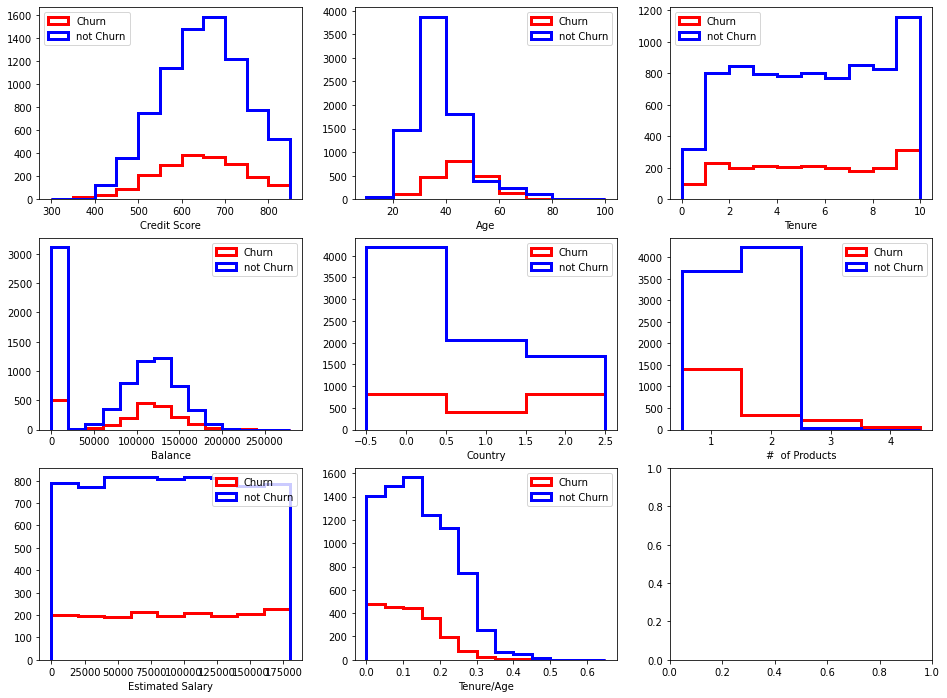

In [31]:
plot_vars(normed=False)

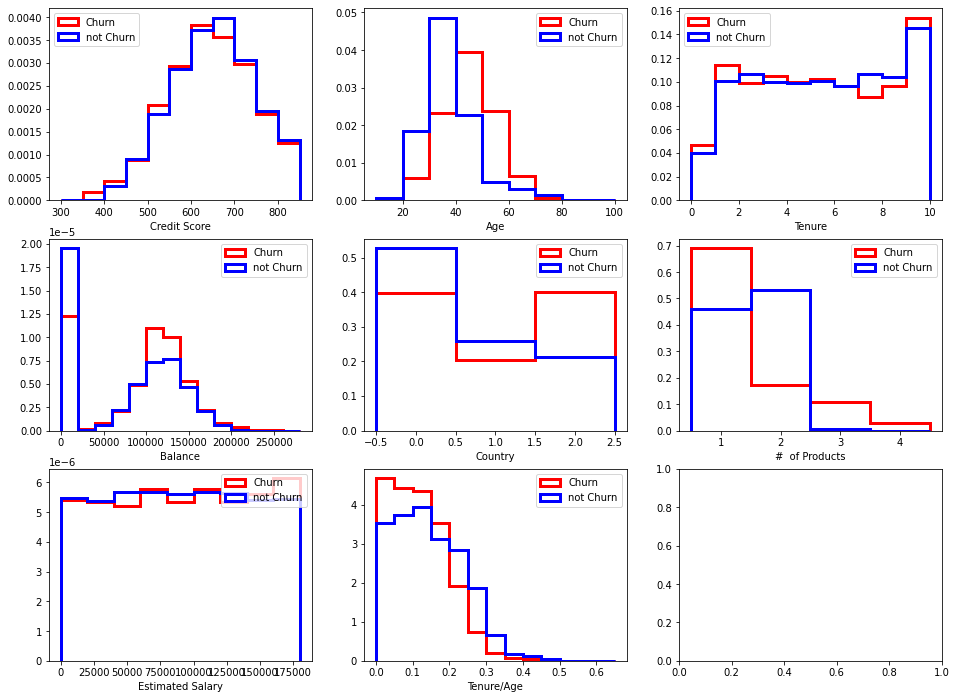

In [32]:
plot_vars(normed=True)

In [33]:
attributes = ['age', 'balance', 'tenure', 'num_products',
              'credit_score', 'salary', 'country']

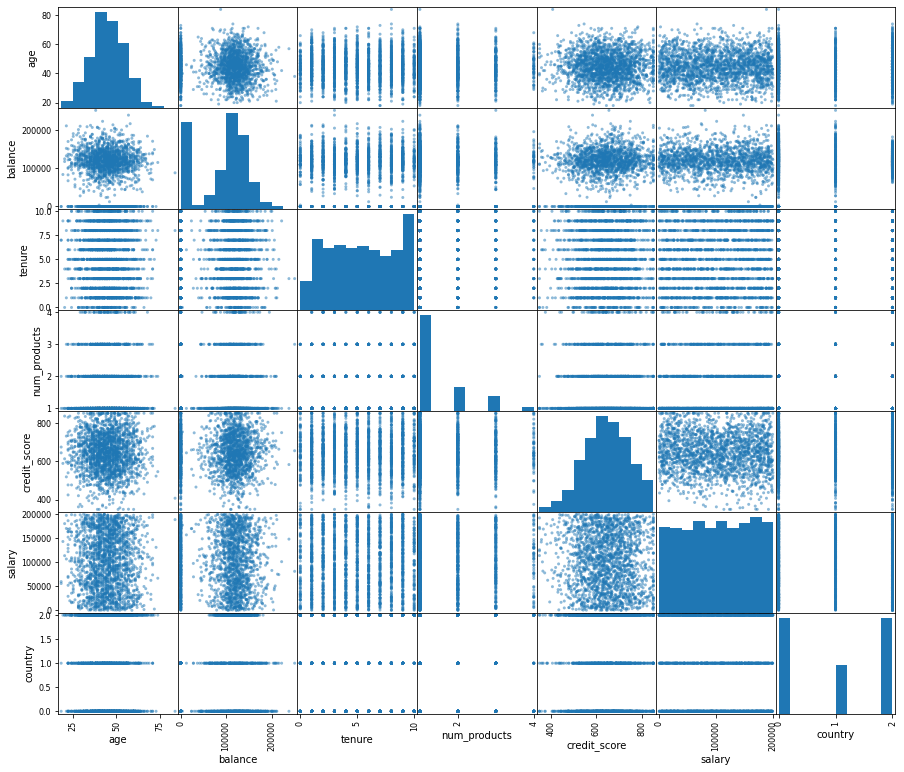

In [34]:
scatter_matrix(df1[mask][attributes], figsize=(15, 13))
plt.show()

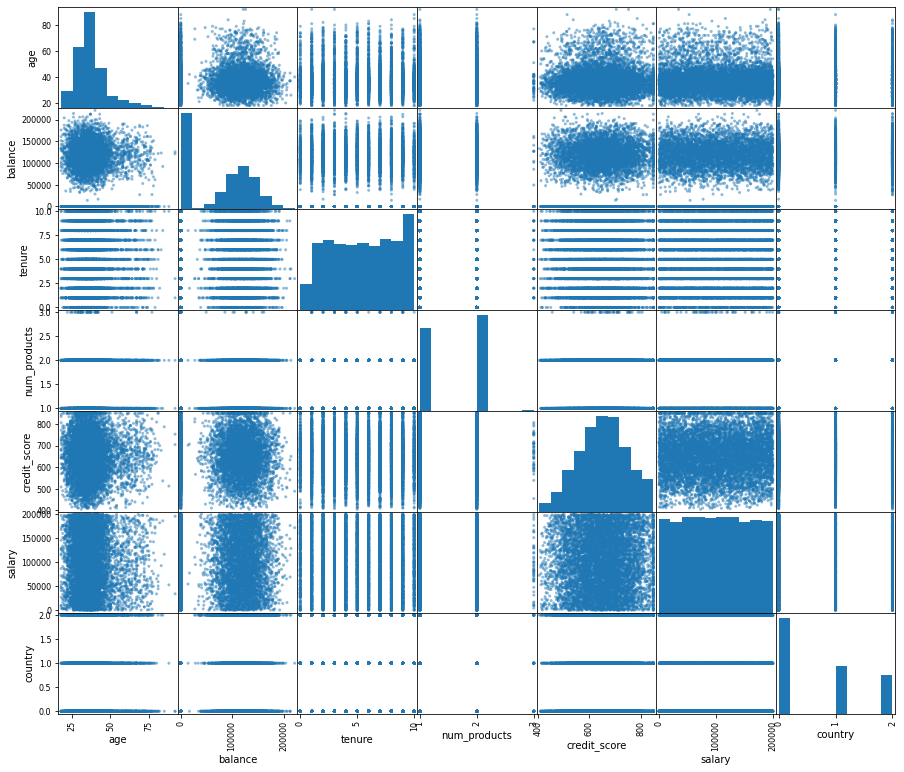

In [35]:
scatter_matrix(df1[~mask][attributes], figsize=(15, 13))
plt.show()

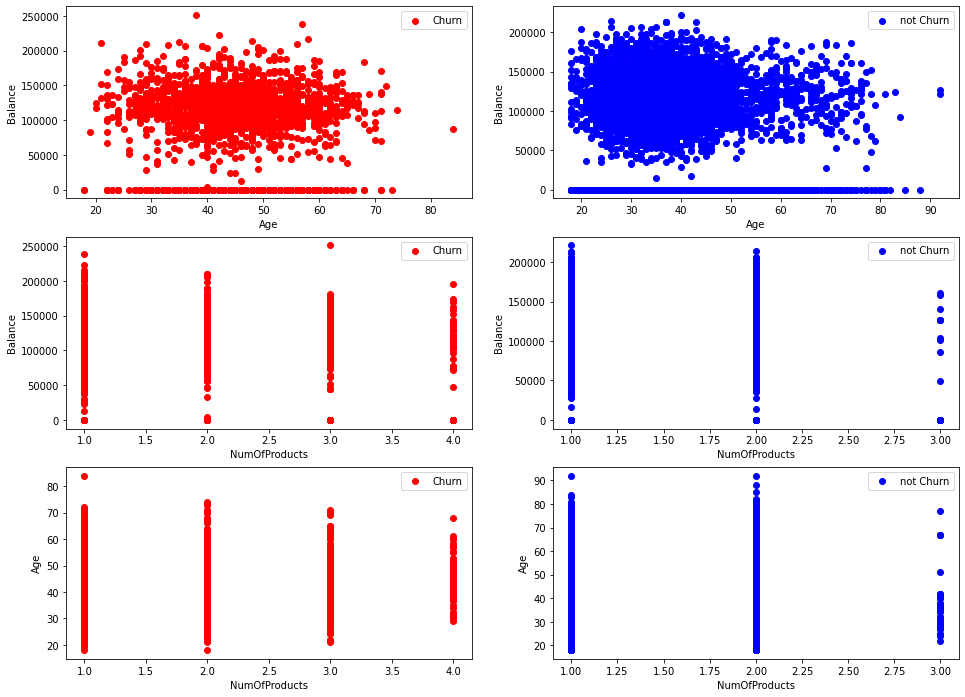

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
(ax1, ax2), (ax3, ax4), (ax5, ax6) = ax

ax1.scatter(x=df1.age[mask], y=df1.balance[mask], label='Churn', color='r')  
ax1.set_xlabel('Age')
ax1.set_ylabel('Balance')
ax1.legend(loc='best')

ax2.scatter(x=df1.age[~mask], y=df1.balance[~mask], label='not Churn', color='b')
ax2.set_xlabel('Age')
ax2.set_ylabel('Balance')
ax2.legend(loc='best')

ax3.scatter(x=df1.num_products[mask], y=df1.balance[mask], label='Churn', color='r')  
ax3.set_xlabel('NumOfProducts')
ax3.set_ylabel('Balance')
ax3.legend(loc='best')

ax4.scatter(x=df1.num_products[~mask], y=df1.balance[~mask], label='not Churn', color='b')
ax4.set_xlabel('NumOfProducts')
ax4.set_ylabel('Balance')
ax4.legend(loc='best')

ax5.scatter(x=df1.num_products[mask], y=df1.age[mask], label='Churn', color='r')  
ax5.set_xlabel('NumOfProducts')
ax5.set_ylabel('Age')
ax5.legend(loc='best')

ax6.scatter(x=df1.num_products[~mask], y=df1.age[~mask], label='not Churn', color='b')
ax6.set_xlabel('NumOfProducts')
ax6.set_ylabel('Age')
ax6.legend(loc='best')

plt.show()

In [39]:
table = df1.groupby(['exited', 'credit_card']).agg('count').balance.unstack()
print_prop(table)
table

Total of credit_card = 10000
Proportion of credit_card==0: 29.45%
Proportion of credit_card==1: 70.55%
Proportion of credit_card==0 that Churned: 20.81%
Proportion of credit_card==1 that Churned: 20.18%


credit_card,0,1
exited,,
0,2332,5631
1,613,1424


In [41]:
table = df1.groupby(['exited', 'gender']).agg('count').balance.unstack()
print_prop(table)
table

Total of gender = 10000
Proportion of gender==0: 54.57%
Proportion of gender==1: 45.43%
Proportion of gender==0 that Churned: 16.46%
Proportion of gender==1 that Churned: 25.07%


gender,0,1
exited,,
0,4559,3404
1,898,1139


In [42]:
table = df1.groupby(['exited', 'active_member']).agg('count').balance.unstack()
print_prop(table)
table

Total of active_member = 10000
Proportion of active_member==0: 48.49%
Proportion of active_member==1: 51.51%
Proportion of active_member==0 that Churned: 26.85%
Proportion of active_member==1 that Churned: 14.27%


active_member,0,1
exited,,
0,3547,4416
1,1302,735


In [43]:
table = df1.groupby(['exited', 'geography']).agg('count').balance.unstack()
print_prop3(table)
table

Total of geography = 10000
Proportion of France: 50.14%
Proportion of Spain: 24.77%
Proportion of Germany: 25.09%
Proportion of France that Churned: 16.15%
Proportion of Spain that Churned: 16.67%
Proportion of Germany that Churned: 32.44%


geography,France,Germany,Spain
exited,,,
0,4204,1695,2064
1,810,814,413


# Prepare for Models

In [47]:
df1.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_products', 'credit_card', 'active_member', 'salary', 'exited',
       'country__france', 'country__germany', 'country__spain', 'country'],
      dtype='object')

In [49]:
y = df1.exited
X = df1.copy()

In [50]:
X.drop(columns=['geography', 'country', 'exited'], inplace=True)
assert len(X) == len(y)

In [51]:
X.to_csv('data/X.csv', index=False)
y.to_csv('data/y.csv', index=False)

# Pergunta 1 - Qual a taxa de Churn atual da empresa?

In [44]:
total_churn = df1.exited.sum()
churn_ratio = total_churn / len(df1)

print(f'Numero total de churns = {total_churn}')
print(f'Taxa de churn = {100.*churn_ratio:.2f}%')

Numero total de churns = 2037
Taxa de churn = 20.37%


# Como a taxa de Churn varia por mês?